# Performance

* $p$: cores/processes
* $T_{serial}$: the serial run time
* $T_{parallel}$: the parallel run time

# Speedup

* $S$: speed up of a parallel program

$$
S = \frac{T_{serial}}{T_{parallel}}
$$

linear speedup: 

$$
T_{parallel} = T_{serial} / p \\
S = p
$$

# Efficiency

* $E$: the efficiency of the parallel program

$$
E = \frac{S}{p} = \frac{T_{serial}}{p T_{parallel}}
$$

随着$p$的增加, 并行开销也在增加.

* $T_{overhead}$: parallel overhead

$$
T_{parallel} = T_{serial} / p + T_{overhead}
$$

$$
E = \frac{S}{p} = \frac{T_{serial}}{p (T_{serial} / p + T_{overhead}) } = \frac{T_{serial}}{T_{serial} + p T_{overhead}} \lt 1 = E_{Liear Speedup}
$$

# Amdahl's law

可以将串行程序的90%并行化

$$
T_{parallel} = 0.9 \times T_{serial} / p + 0.1 \times T_{serial} \\


\begin{equation}
\begin{split}
S &= \frac{T_{serial}}{T_{parallel}} \\
  &= \frac{T_{serial}}{0.9 \times T_{serial} / p + 0.1 \times T_{serial}} \\
  &= \frac{1}{0.9 / p  + 0.1} \\
  &= \frac{10p}{9 + p}
\end{split}
\end{equation}
$$

* $r$: 串行程序中未并行化的比例

$$
T_{parallel} = (1-r) \times T_{serial} / p + r \times T_{serial} \\


\begin{equation}
\begin{split}
S &= \frac{T_{serial}}{T_{parallel}} \\
  &= \frac{T_{serial}}{(1-r) \times T_{serial} / p + r \times T_{serial}} \\
  &= \frac{1}{(1-r) / p  + r} \\
  &< \frac{1}{r}
\end{split}
\end{equation}
$$

$$
r = T
$$

3.10.0
99.01970492127934 99


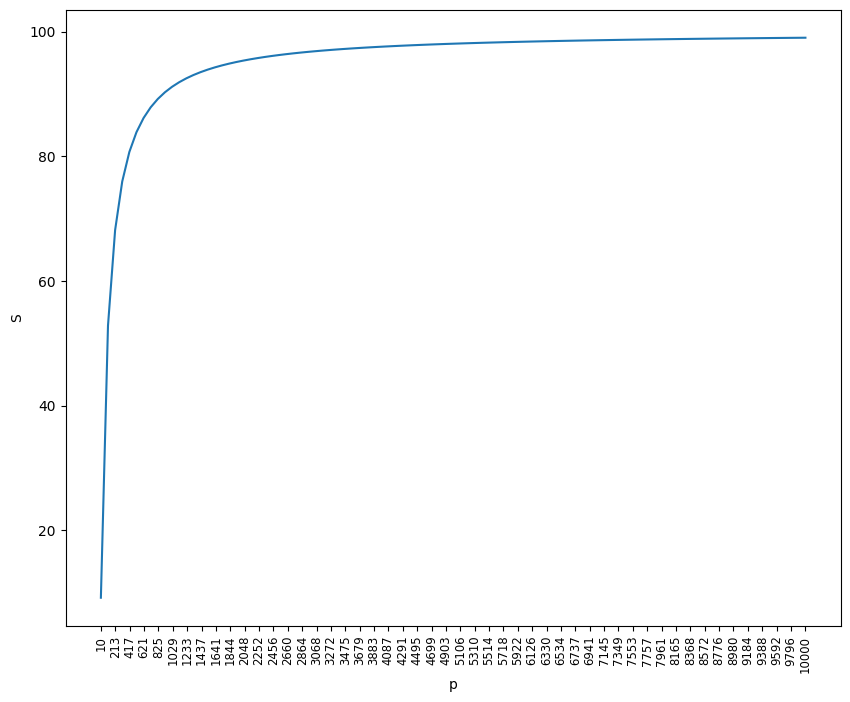

In [43]:
%matplotlib inline
import matplotlib
print(matplotlib.__version__)

import matplotlib.pyplot as plt

import numpy as np

# r = 0.01, 即使几千个核, 也无法达到加速比 1/r = 100
MAX_P = 10000
p = np.linspace(10, MAX_P, 100)
r = np.ones((len(p),)) / 100
S = p / (1 - r + p * r)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
p_ticks = np.linspace(10, MAX_P, 50).astype(np.int64)
ax.set_xticks(p_ticks)
ax.set_xticklabels(p_ticks, rotation=90, fontsize='small')
ax.set_xlabel('p')
ax.set_ylabel('S')
ax.plot(p, S)
print(np.max(S), np.argmax(S))

# Scalability

* $n$: 问题规模

程序可扩展的: 增加了程序使用的核数$p$, 可以找到使得程序保持效率$E$的问题规模$n$的相应增长率.


假设:
* $T_{serial} = n$ 毫秒
* $T_{parallel} = n / p + 1$

$$
E = \frac{S}{p}
  = \frac{T_{serial}}{p \times T_{parallel}}
  = \frac{n}{p \times ((n/p) + 1)}
  = \frac{n}{n + p}
$$

* $k$: 核数的增长因子
* $x$: 问题规模的增长因子

$$
E = \frac{n}{n + p}
  = \frac{xn}{xn + kp}
$$

如果$x = k$, 则$E = \frac{n}{n+p}$保持不变, 程序是可扩展的.


$$
Exn + Ekp = xn \\
xn - Exn = Ekp \\
x = \frac{Ekp}{1 - En} = \frac{p}{1/E - n} k
$$

$$
E = \frac{S}{p} = \frac{\frac{1}{(1-r) / p  + r}}{p}
$$

MAKE NO SENSE!!!!

- Read 'Analyzing scalability of parallel algorithms and architectures'

在问题规模$n$增长时, 增加核数$p$, 可以保持程序效率$E$固定.

# Timing

* CPU time
  * C `clock`
* Wall clock time
  * MPI `MPI_Wtime()`
  * OpenMP `omp_get_wtime()`
* Use **barrier** to get the exact execution time: the time elapsed from the first process began execution to the time the last process finished execution.

# GPU Performance

- TODO